# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #2
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 9th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
from functools import partial

## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:
$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$
Let $h$ be the following function of $X$:
$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$

Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:
- inverse transform sampling
- rejection sampling with both uniform proposal distribution and normal proposal distribution (with appropriately chosen parameters)
- importance sampling with both uniform proposal distribution and normal proposal distribution (with appropriately chosen parameters)

**Solutions (just for validation, not for release to students): **
The CDF:
$$
F_X(x) = \begin{cases}
\frac{1}{12}(x^2/2-x) + \frac{1}{24}, &1\leq x\leq 3\\
-\frac{1}{12}(x^2/2-5x) - \frac{7}{8} + \frac{1}{6}, &3< x\leq 5\\
\frac{1}{6}(x^2/2-5x) + \frac{25}{12} + \frac{1}{3}, &5< x\leq 7\\
-\frac{1}{6}(x^2/2 - 9x) + \frac{1}{3} + \frac{1}{6}, &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

So...
$$
F^{-1}_X(y) = \begin{cases}
[quadratic formula], &0\leq y\leq \frac{1}{6}\\
[quadratic formula], &\frac{1}{6}< y\leq \frac{1}{3}\\
[quadratic formula], &\frac{1}{3}< y\leq \frac{2}{3}\\
[quadratic formula], &\frac{2}{3}< y\leq 1\\
0, &otherwise
\end{cases}
$$

In [27]:
def f_X(x):
    if x >= 1 and x <= 3:
        return 1./12 * (x - 1.)
    elif x > 3 and x <= 5:
        return -1./12 * (x - 5)
    elif x > 5 and x <= 7:
        return 1./6 * (x - 5)
    elif x > 7 and x <= 9:
        return -1./6 * (x - 9)
    else:
        return 0.
    
def f_X_1(x):
    if x >= 1 and x <= 3:
        return 1./12 * (x - 1.)
    elif x > 3 and x <= 5:
        return -1./12 * (x - 5)
    else:
        return 0.
    
def f_X_2(x):
    if x > 5 and x <= 7:
        return 1./6 * (x - 5)
    elif x > 7 and x <= 9:
        return -1./6 * (x - 9)
    else:
        return 0.

def rejection(n, prop_dist, c, true_dist):
    samples = []
    for i in range(n):
        sample = prop_dist(n=1)
        if np.random.uniform(0, c * prop_dist(x=sample)) <= true_dist(sample):
            samples.append(sample[0])
            
    return samples

def h(x):
    return 1./(3 * 2**.5 * np.pi) * np.exp(-1./18 * (x - 5)**2)

def normal_dist(mu, sigma, x=None, n=None):
    if x is not None:
        return norm.pdf(x, mu, sigma)
    elif n is not None:
        return np.random.normal(mu, sigma, n)
    else:
        return None

99 out of 1000 samples accepted


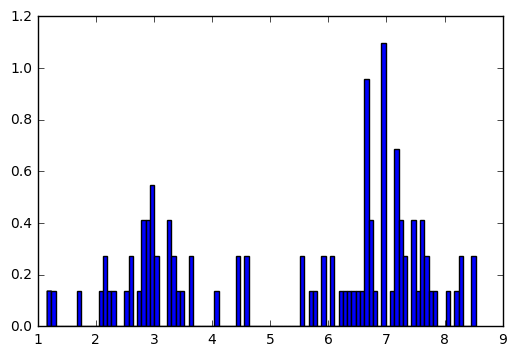

In [29]:
prop_dist = partial(normal_dist, mu=7, sigma=10)

samples = rejection(1000, prop_dist, 10, f_X)
print '{} out of {} samples accepted'.format(len(samples), 1000)
plt.hist(list(samples), bins=100, normed=1)
plt.show()

In [23]:
#rejction
means = [np.mean(map(h, rejection(1000, prop_dist, 10, f_X))) for i in range(100)]
print 'rejection mean: {}'.format(np.mean(means))
print 'rejection std: {}'.format(np.std(means))

rejection mean: 0.0589390952337
rejection std: 0.000934708673329


In [24]:
#importance
means = []
for i in range(100):
    samples = prop_dist(n=1000)
    weights = map(f_X, samples) / prop_dist(x=samples)
    means.append(np.multiply(map(h, samples), weights).sum() / weights.sum())
print 'importance mean: {}'.format(np.mean(means))  
print 'importance std: {}'.format(np.std(means))

importance mean: 0.0588182126054
importance std: 0.000529272577642


In [25]:
#stratified
prop_dist_1 = partial(normal_dist, mu=3, sigma=0.1)
prop_dist_2 = partial(normal_dist, mu=7, sigma=0.1)

means = []
for i in range(100):
    means.append(1./3 * np.mean(map(h, rejection(500, prop_dist_1, 5, f_X_1))) + 2./3 * np.mean(map(h, rejection(500, prop_dist_2, 5, f_X_2))))
    
print 'stratified mean: {}'.format(np.mean(means))
print 'stratified std: {}'.format(np.std(means))

stratified mean: 0.0600950393072
stratified std: 0.000384622116685


## Problem 2: Variance Reduction

### Part A

- Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. Which sampling methods, proposal distributions resulted in lower variances? Are the results what you expected?

- What can be done to further reduce the variance of the estimate of $\mathbb{E}[h(X)]$ resulting from each sampling method?

### Part B

- [I want them to try strattified sampling and control variates]